In [1]:
import numpy as np
import scipy.io as scio
from scipy import signal
import tdt
import os
import  wave
import matplotlib.pyplot as plt
import json
from scipy.fftpack import fft
from random import shuffle
import h5py
import scipy.io as scio
import scipy.io.wavfile
import math
import mne
import os
from multiprocessing import Pool
from concurrent.futures import ThreadPoolExecutor
import torch
from torch.utils import data as Data
import torch.nn as nn
import seaborn as sns
from ecog_band import EcogBandRes
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, Subset,Dataset
from ecog_band.solver import Nfold_solver
from ecog_band.models import ECOGRes50_feature,ECOGRes50
from ecog_band.datasetSigband import CustomDatasetSigband
from ecog_band.utils import *

/root/pp/covert-reading/Ecog_pretrain/ecog_band/solver.py:8: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm  # may raise warning about Jupyter


In [2]:
bands_list=['else1','delta','theta','alpha','beta', 'gamma','high gamma','else2']
HS=86
freq=500
elec=7
best_fold_model_path = '/root/pp/covert-reading/Ecog_pretrain/permut_best_models'

In [3]:
# begain permutation test
results = {} # 存储每一个band的五次交叉验证结果
n_permutations = 1
for i in range(n_permutations):
    for band_each in bands_list:
        path_elec=f'/public/DATA/overt_reading/dataset/HS86/500/{elec}'
        num_samples=len(os.listdir(path_elec)) # 12
        print(num_samples)
        data_loader = CustomDatasetSigband(HS, path_elec, freq, elec, num_samples, band_each, exclude=True)
        for batch in data_loader:
            print(batch[0].shape,batch[1]) #[1, 1, 375] 0
            break

        net=ECOGRes50_feature()

        optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
        lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.95)

        solver = Nfold_solver(
            model = net,
            optimizer = optimizer,
            criterion = nn.BCEWithLogitsLoss(),
            lr_scheduler = lr_scheduler,
            )
        # print(net)

        fold_results, fold_all_labels, fold_all_preds = solver.train(
                    epochs=10,
                    data_loader=data_loader,
                    band=band_each,
                    best_fold_model_path=os.path.join(best_fold_model_path,str(elec)),
                    permutation_test=True
                    )
        # all_y_true = [label for sublist in fold_all_labels for label in sublist]
        # all_y_pred = [label for sublist in fold_all_preds for label in sublist]
        if band_each not in results:
            results[band_each] = {'y_true': [], 'y_pred': []}
        
        results[band_each]['y_true'].append(fold_all_labels)
        results[band_each]['y_pred'].append(fold_all_preds)

# pltbox_band_five_cross_validation(band_acc_list, permutation=True)

12
torch.Size([1, 500, 375]) tensor(0)
Fold 1


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:02<00:00, 49.70block/s, val_avg_loss=0.655]


Fold 2


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:02<00:00, 51.44block/s, val_avg_loss=0.726]


Fold 3


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:02<00:00, 54.17block/s, val_avg_loss=1.42]


Fold 4


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:02<00:00, 53.52block/s, val_avg_loss=1.74]


Fold 5


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:04<00:00, 28.93block/s, val_avg_loss=2.57]


Cross-Validation Accuracy: 0.6666666865348816 ± 0.0
12
torch.Size([1, 498, 375]) tensor(0)
Fold 1


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:10<00:00, 13.79block/s, val_avg_loss=0.835]


Fold 2


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:09<00:00, 14.74block/s, val_avg_loss=0.695]


Fold 3


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:12<00:00, 11.80block/s, val_avg_loss=1.44]


Fold 4


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:13<00:00, 10.44block/s, val_avg_loss=1.53]


Fold 5


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:09<00:00, 15.57block/s, val_avg_loss=2.14]


Cross-Validation Accuracy: 0.6263889074325562 ± 0.01482928916811943
12
torch.Size([1, 497, 375]) tensor(0)
Fold 1


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:10<00:00, 14.02block/s, val_avg_loss=0.626]


Fold 2


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:12<00:00, 11.39block/s, val_avg_loss=1.14]


Fold 3


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:13<00:00, 10.35block/s, val_avg_loss=0.675]


Fold 4


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:11<00:00, 12.02block/s, val_avg_loss=1.66]


Fold 5


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:09<00:00, 15.00block/s, val_avg_loss=1.45]


Cross-Validation Accuracy: 0.6666666865348816 ± 0.0
12
torch.Size([1, 497, 375]) tensor(0)
Fold 1


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:13<00:00, 10.88block/s, val_avg_loss=0.716]


Fold 2


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:10<00:00, 13.92block/s, val_avg_loss=0.678]


Fold 3


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:09<00:00, 14.48block/s, val_avg_loss=0.679]


Fold 4


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:10<00:00, 13.90block/s, val_avg_loss=1.75]


Fold 5


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:10<00:00, 13.23block/s, val_avg_loss=1.84]


Cross-Validation Accuracy: 0.6569444537162781 ± 0.04577014595270157
12
torch.Size([1, 483, 375]) tensor(0)
Fold 1


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:12<00:00, 11.29block/s, val_avg_loss=0.851]


Fold 2


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:09<00:00, 15.05block/s, val_avg_loss=0.703]


Fold 3


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:09<00:00, 15.92block/s, val_avg_loss=0.718]


Fold 4


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:09<00:00, 14.63block/s, val_avg_loss=1.95]


Fold 5


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:10<00:00, 13.50block/s, val_avg_loss=1.33]


Cross-Validation Accuracy: 0.574999988079071 ± 0.06123724579811096
12
torch.Size([1, 461, 375]) tensor(0)
Fold 1


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:13<00:00, 11.06block/s, val_avg_loss=0.766]


Fold 2


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:10<00:00, 14.29block/s, val_avg_loss=0.679]


Fold 3


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:10<00:00, 13.59block/s, val_avg_loss=1.16]


Fold 4


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:11<00:00, 12.24block/s, val_avg_loss=1.61]


Fold 5


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:11<00:00, 13.02block/s, val_avg_loss=1.52]


Cross-Validation Accuracy: 0.6819444894790649 ± 0.0027777671348303556
12
torch.Size([1, 421, 375]) tensor(0)
Fold 1


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:09<00:00, 15.46block/s, val_avg_loss=0.789]


Fold 2


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:09<00:00, 14.96block/s, val_avg_loss=0.702]


Fold 3


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:11<00:00, 12.12block/s, val_avg_loss=0.835]


Fold 4


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:13<00:00, 10.43block/s, val_avg_loss=0.881]


Fold 5


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:13<00:00, 10.66block/s, val_avg_loss=3.02]


Cross-Validation Accuracy: 0.6527777910232544 ± 0.0
12
torch.Size([1, 150, 375]) tensor(0)
Fold 1


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:10<00:00, 13.94block/s, val_avg_loss=1.13]


Fold 2


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:09<00:00, 15.30block/s, val_avg_loss=0.693]


Fold 3


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:10<00:00, 13.32block/s, val_avg_loss=1.64]


Fold 4


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:11<00:00, 12.88block/s, val_avg_loss=1.36]


Fold 5


[Validation] Epoch 10/10: 100%|██████████| 144/144 [00:10<00:00, 14.27block/s, val_avg_loss=1.43]

Cross-Validation Accuracy: 0.6736111044883728 ± 0.0


# calculate accuracy for each band

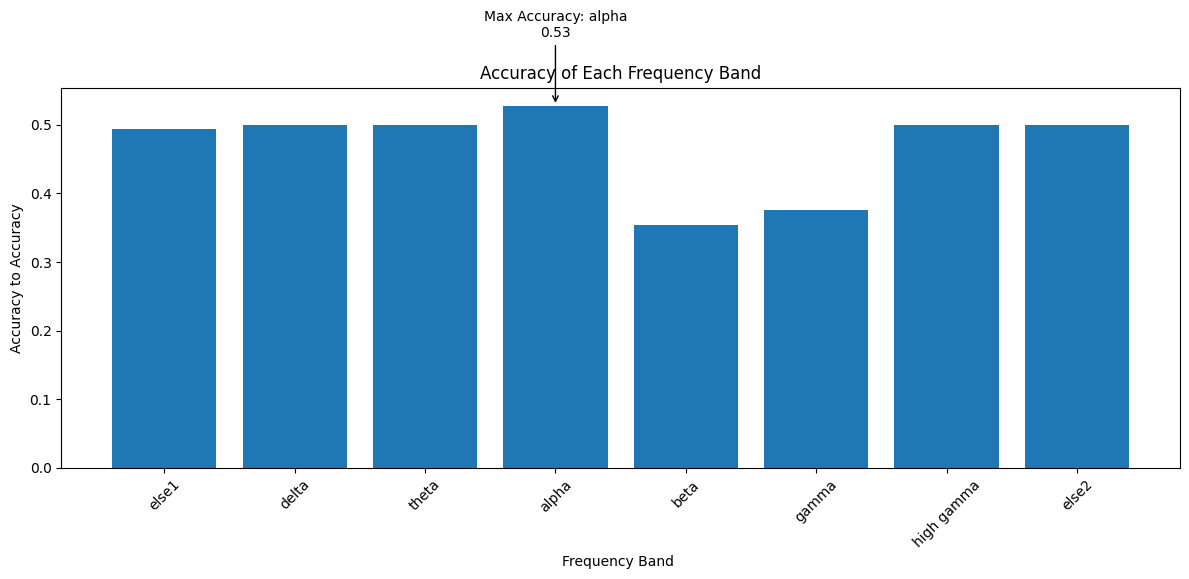

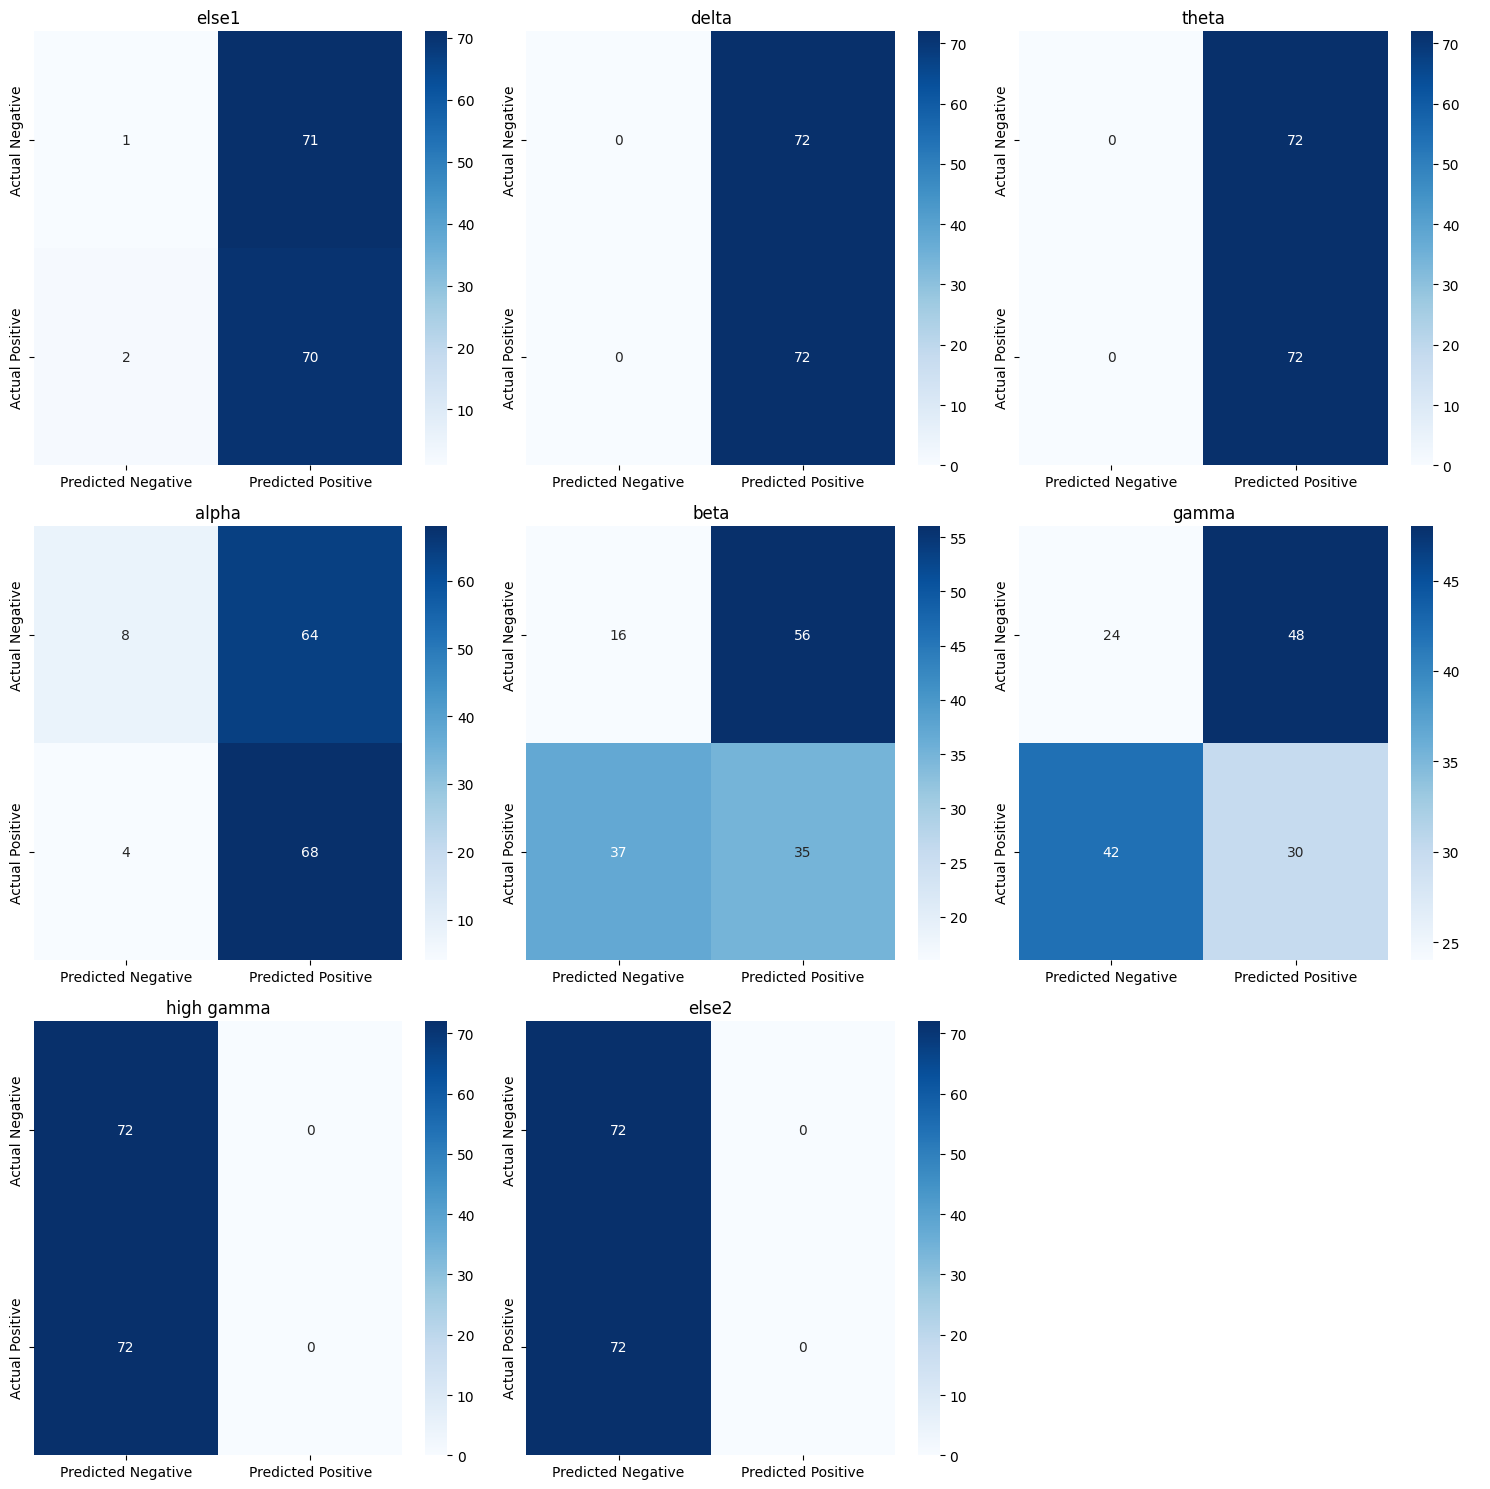

In [4]:
accuracy = []
cm = {}
for band in bands_list:
    y_true = [label for sublist in results[band]['y_true'] for label in sublist][0]
    y_pred = [pred for sublist in results[band]['y_pred'] for pred in sublist][0]
    accuracy.append(accuracy_score(y_true, y_pred))
    cm[band] = confusion_matrix(y_true, y_pred)

pltbar_accuracy(accuracy, bands_list)
plt_allband_confusion_matrices(cm, bands_list)